<a href="https://colab.research.google.com/github/shyakx/linear_regression_model_23/blob/main/multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   Credit_Score   Loan_Amount  Business_Type  Years_in_Operation  \
0           402  64792.870623  Manufacturing                  14   
1           735  71096.125454         Retail                  14   
2           570  48181.401153  Manufacturing                   2   
3           406  64618.017608  Manufacturing                  23   
4           371  60509.859633    Agriculture                   5   

   Annual_Revenue_Growth_Rate  
0                   20.645872  
1                   27.430093  
2                   20.683676  
3                   11.505903  
4                   13.188084  

Dataset Shape: (500, 5)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Credit_Score                500 non-null    int64  
 1   Loan_Amount                 500 non-null   

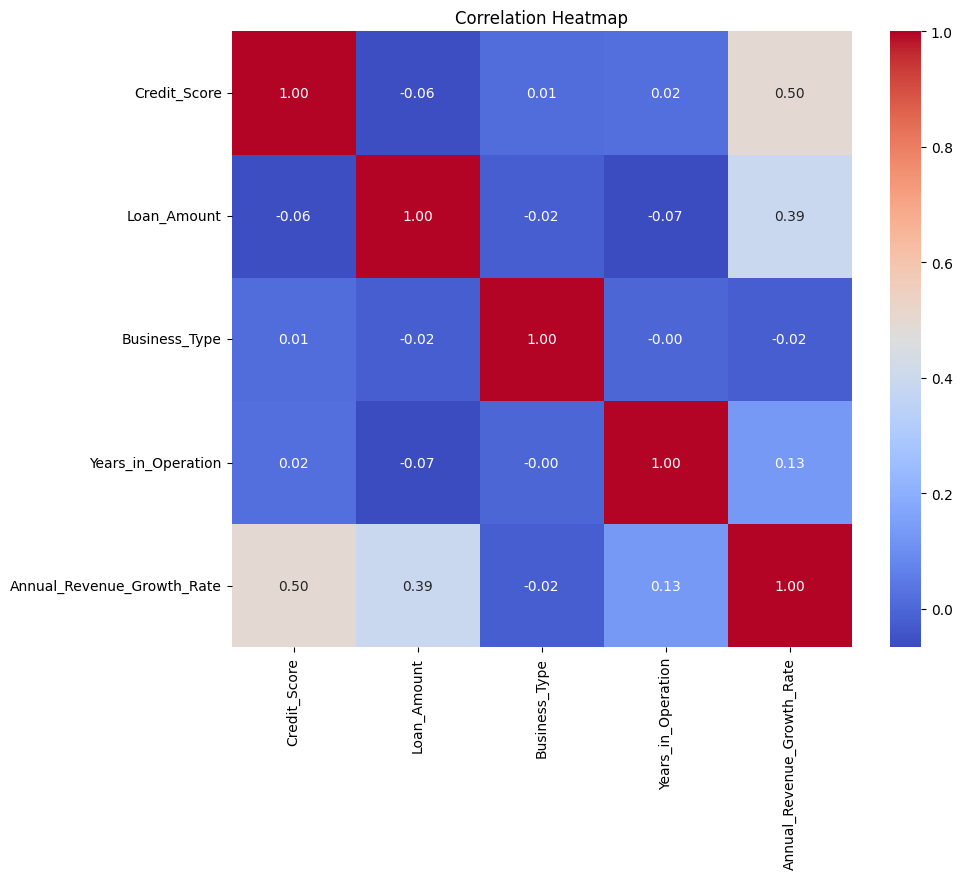


Scaler saved as 'scale.pkl'

First 5 rows of the scaled features:
   Credit_Score  Loan_Amount  Business_Type  Years_in_Operation
0     -1.048040     0.508517      -0.689854           -0.057604
1      1.061852     0.740752       0.021336           -0.057604
2      0.016410    -0.103510      -0.689854           -1.497717
3     -1.022696     0.502074      -0.689854            1.022480
4     -1.244456     0.350715      -1.401044           -1.137689

Decision Tree Performance:
R²: -0.40331760885906576, MSE: 54.2156663141913, RMSE: 7.363128839983129

Linear Regression Performance:
R²: 0.3775974286316457, MSE: 24.04585384618388, RMSE: 4.903657190932486

Random Forest Performance:
R²: 0.3197287849486903, MSE: 26.28154664741704, RMSE: 5.126553096127752

Best Model: Linear Regression
Linear Regression model saved as 'best_model.pkl'


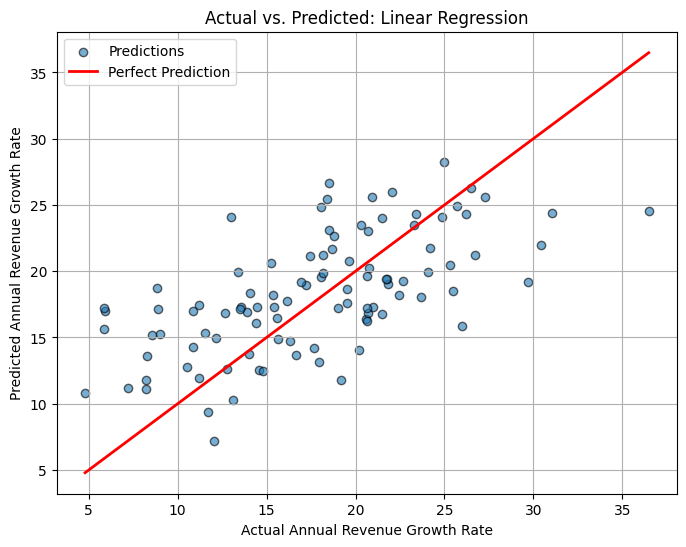

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Step 1: Load the dataset
# Replace the file path with the correct path to your dataset
df = pd.read_csv('/content/financial_inclusion_dataset.csv')
print("First 5 rows of the dataset:")
print(df.head())

# Step 2: Display dataset structure
print("\nDataset Shape:", df.shape)
print("\nDataset Information:")
print(df.info())

# Step 3: Data Conversion
# Convert the 'Business_Type' column to numerical values using LabelEncoder
label_encoder = LabelEncoder()
df['Business_Type'] = label_encoder.fit_transform(df['Business_Type'])
print("\nDataset after encoding 'Business_Type':")
print(df.head())

# Step 4: Correlation Heatmap using sns.heatmap
# Visualizing correlations among features and target
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Step 5: Data Scaling
# Separate features (X) and target (y), and scale the features
X = df.drop(['Annual_Revenue_Growth_Rate'], axis=1)
y = df['Annual_Revenue_Growth_Rate']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scale.pkl")  # Save the scaler for future use
print("\nScaler saved as 'scale.pkl'")

# Convert scaled features back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("\nFirst 5 rows of the scaled features:")
print(X_scaled.head())

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Model Training and Evaluation

# A. Decision Tree Regressor
decision = DecisionTreeRegressor(random_state=42)
decision.fit(X_train, y_train)
decision_prediction = decision.predict(X_test)
decision_r2 = r2_score(y_test, decision_prediction)
decision_mse = mean_squared_error(y_test, decision_prediction)
print("\nDecision Tree Performance:")
print(f"R²: {decision_r2}, MSE: {decision_mse}, RMSE: {np.sqrt(decision_mse)}")

# B. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_prediction = linear_model.predict(X_test)
linear_r2 = r2_score(y_test, linear_prediction)
linear_mse = mean_squared_error(y_test, linear_prediction)
print("\nLinear Regression Performance:")
print(f"R²: {linear_r2}, MSE: {linear_mse}, RMSE: {np.sqrt(linear_mse)}")

# C. Random Forest Regressor
random = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
random.fit(X_train, y_train)
random_prediction = random.predict(X_test)
random_r2 = r2_score(y_test, random_prediction)
random_mse = mean_squared_error(y_test, random_prediction)
print("\nRandom Forest Performance:")
print(f"R²: {random_r2}, MSE: {random_mse}, RMSE: {np.sqrt(random_mse)}")

# Step 8: Model Comparison
# Compare the R² scores of all models and identify the best one
model_scores = {
    "Linear Regression": linear_r2,
    "Decision Tree": decision_r2,
    "Random Forest": random_r2
}
best_model_name = max(model_scores, key=model_scores.get)  # Model with the highest R² score
print(f"\nBest Model: {best_model_name}")

# Step 9: Save the Best Model
if best_model_name == 'Linear Regression':
    joblib.dump(linear_model, "best_model.pkl")
    print("Linear Regression model saved as 'best_model.pkl'")
elif best_model_name == 'Decision Tree':
    joblib.dump(decision, "best_model.pkl")
    print("Decision Tree model saved as 'best_model.pkl'")
elif best_model_name == 'Random Forest':
    joblib.dump(random, "best_model.pkl")
    print("Random Forest model saved as 'best_model.pkl'")

# Step 10: Visualization of Actual vs Predicted (Best Model)
# Use the best model's predictions for visualization
if best_model_name == 'Linear Regression':
    best_model_prediction = linear_prediction
elif best_model_name == 'Decision Tree':
    best_model_prediction = decision_prediction
else:
    best_model_prediction = random_prediction

plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_model_prediction, alpha=0.6, edgecolors='k', label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Prediction")
plt.xlabel('Actual Annual Revenue Growth Rate')
plt.ylabel('Predicted Annual Revenue Growth Rate')
plt.title(f'Actual vs. Predicted: {best_model_name}')
plt.legend()
plt.grid(True)
plt.show()